In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
sns.set(color_codes=True) 
%matplotlib inline

In [225]:
df=pd.read_csv('hackathon/account_train.csv')
test_df=pd.read_csv('hackathon/account_test.csv')

In [8]:
df

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.38,0.00,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100471,3ade0e2d-b0c1-4092-bae3-f2fba62fb6af,1,Residential,145000,309,2888,78,0,0,25835,0,0.00,8.95,0,1,1
100472,5ac71a8f-b457-4c01-84ee-5a0b89387d0c,1,Residential,750000,1176,31169,427,31091,432,0,0,1.00,0.00,15616,1,0
100473,7d8cdaa6-13a6-4aef-a2c2-3091be566bfb,1,Residential,165000,360,6665,79,3400,378,4974,0,0.51,0.75,0,1,1
100474,151da2b4-8fe2-4607-b415-14cf09ace6f8,1,Residential,2088500,2146,53907,499,34639,4330,128096,0,0.64,2.38,26939,1,1


In [9]:
test_df

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID
0,d0390389-df62-4bf1-8659-bbc736ce777d,1,Residential,45000,291,2569,103,0,0,15104,0,0.00,5.88,0,1
1,b662b850-85e7-40d6-8fdd-3c2566a154dd,1,Residential,440000,794,9065,245,9065,2266,0,0,1.00,0.00,3132,1
2,41b6ebc4-569c-4c93-8cfa-3d85bce546ac,4,Agricultural,991700,3211597,397,397,0,0,0,0,0.00,0.00,0,0
3,6f0ecc23-da5c-4b84-bcd0-4fae4b3a5aec,1,Residential,180000,572,1578,63,5278,586,1741,0,3.35,1.10,0,0
4,6467f24e-d256-4e6d-8c0d-b726e8d80f48,1,Residential,43000,268,30,1,0,0,0,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33488,eb61949a-70b3-46db-b978-9e20f0d8919d,1,Residential,49000,239,266,4,416,46,0,0,1.57,0.00,0,1
33489,6d2d00c3-dbd7-49a7-abc8-b1635af2cc32,1,Residential,21710,322,4475,79,3630,81,3,0,0.81,0.00,703,1
33490,f9ab20e9-5803-46c5-b41e-bed6fda06773,6,Government,83300,316,492,246,492,492,0,0,1.00,0.00,0,0
33491,fedb8241-a9fb-48dd-adfa-b874e0da7ac5,1,Residential,61560,377,350,15,0,0,1047,0,0.00,3.00,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

In [11]:
df.isnull().sum()

AccID                   0
CategoryID              0
Category                0
Value                   0
PropertySize            0
BillingAmt              0
AverageBillingAmt       0
CollectedAmt            0
AverageCollectedAmt     0
DebtAmt                 0
WriteOffAmt             0
CollectionRatio         0
DebtBillingRatio        0
TotalElectricityBill    0
HasID                   0
Label                   0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100476.0,2.245511,2.730572e+00,1.0,1.0,1.0,2.00,13.0
Value,100476.0,707020.754379,3.047463e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.0,0.5,1.00,1701912.0


In [14]:
df.dtypes

AccID                    object
CategoryID                int64
Category                 object
Value                     int64
PropertySize              int64
BillingAmt                int64
AverageBillingAmt         int64
CollectedAmt              int64
AverageCollectedAmt       int64
DebtAmt                   int64
WriteOffAmt               int64
CollectionRatio         float64
DebtBillingRatio        float64
TotalElectricityBill      int64
HasID                     int64
Label                     int64
dtype: object

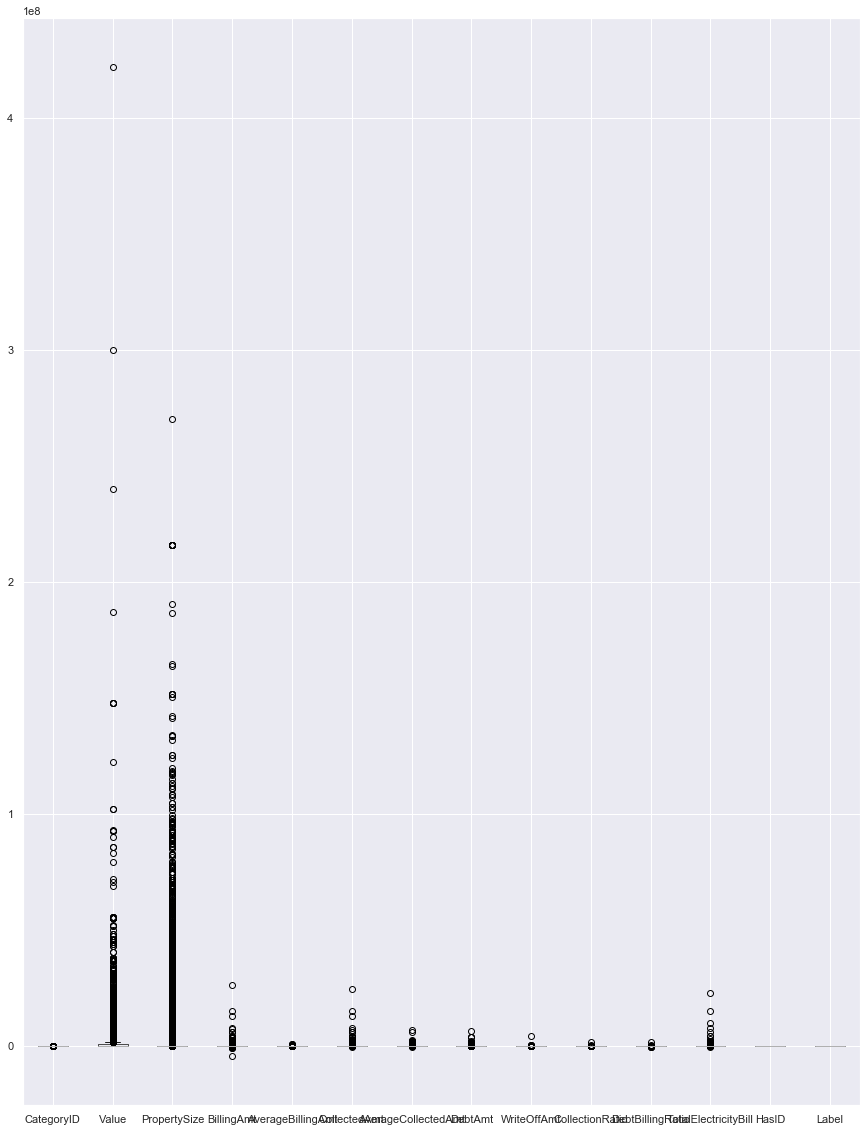

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,20))
df.boxplot() #for plotting boxplots for all the numerical columns in the df

plt.show()

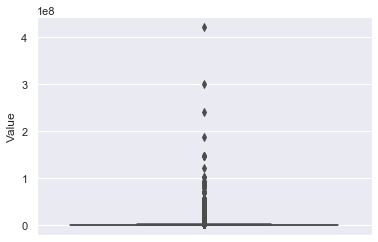

In [24]:

ax = sns.boxplot(y=df['Value'])

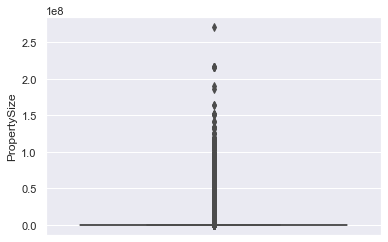

In [25]:

ax = sns.boxplot(y=df['PropertySize'])

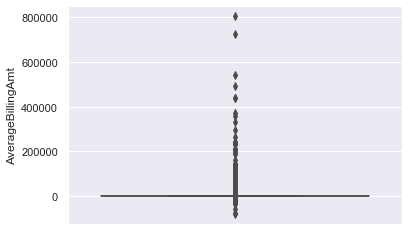

In [26]:
ax = sns.boxplot(y=df['AverageBillingAmt'])

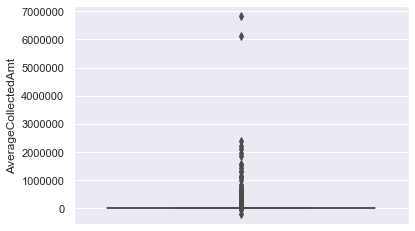

In [27]:
ax = sns.boxplot(y=df['AverageCollectedAmt'])

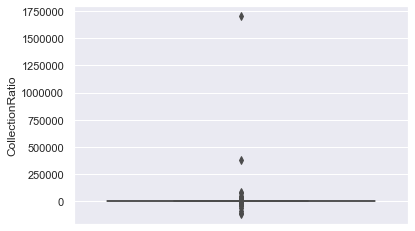

In [28]:
ax = sns.boxplot(y=df['CollectionRatio'])

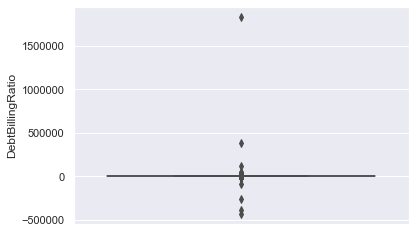

In [29]:
ax = sns.boxplot(y=df['DebtBillingRatio'])

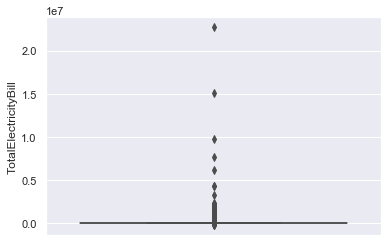

In [30]:
ax = sns.boxplot(y=df['TotalElectricityBill'])

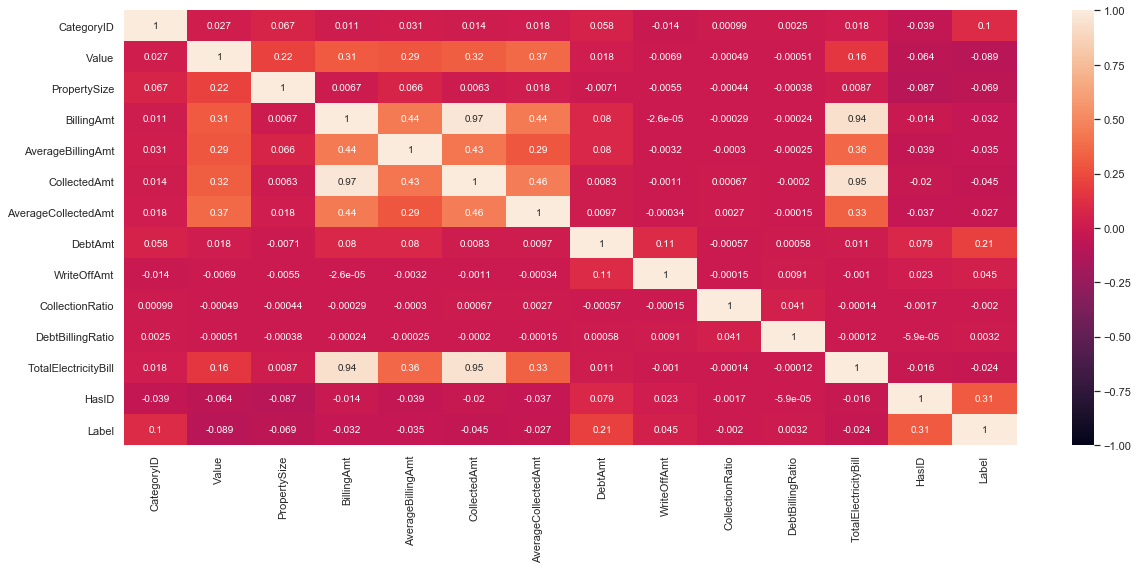

In [31]:
corr=df.corr() 
plt.figure(figsize=(20, 8))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True)


In [32]:
df.skew()

CategoryID                2.407412
Value                    53.982470
PropertySize             15.745179
BillingAmt              125.702129
AverageBillingAmt        63.861157
CollectedAmt            125.396893
AverageCollectedAmt     123.828957
DebtAmt                  43.954872
WriteOffAmt             266.464114
CollectionRatio         288.917422
DebtBillingRatio        245.204258
TotalElectricityBill    146.917432
HasID                     0.292547
Label                     0.154769
dtype: float64

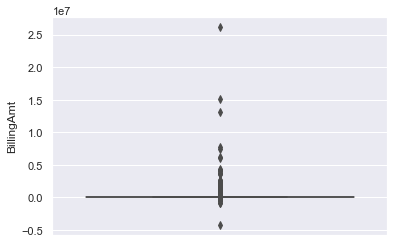

In [37]:
ax = sns.boxplot(y=df['BillingAmt'])

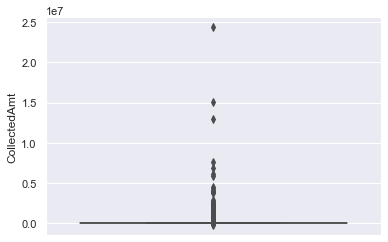

In [38]:
ax = sns.boxplot(y=df['CollectedAmt'])

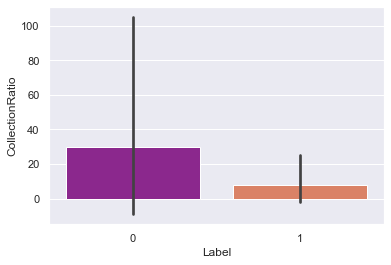

In [40]:

sns.barplot(x ='Label', y ='CollectionRatio', data = df,  
            palette ='plasma', estimator = np.mean)

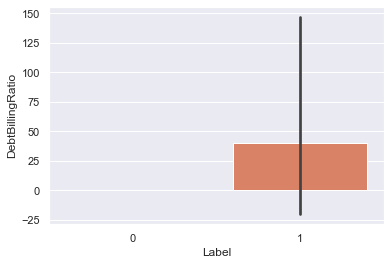

In [41]:

sns.barplot(x ='Label', y ='DebtBillingRatio', data = df,  
            palette ='plasma', estimator = np.mean)

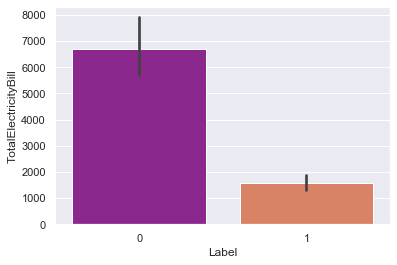

In [42]:

sns.barplot(x ='Label', y ='TotalElectricityBill', data = df,  
            palette ='plasma', estimator = np.mean)

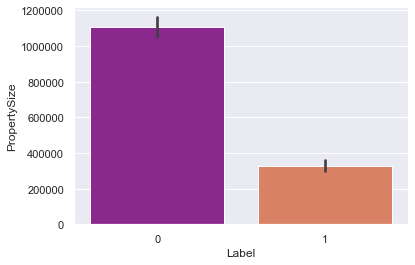

In [43]:

sns.barplot(x ='Label', y ='PropertySize', data = df,  
            palette ='plasma', estimator = np.mean)

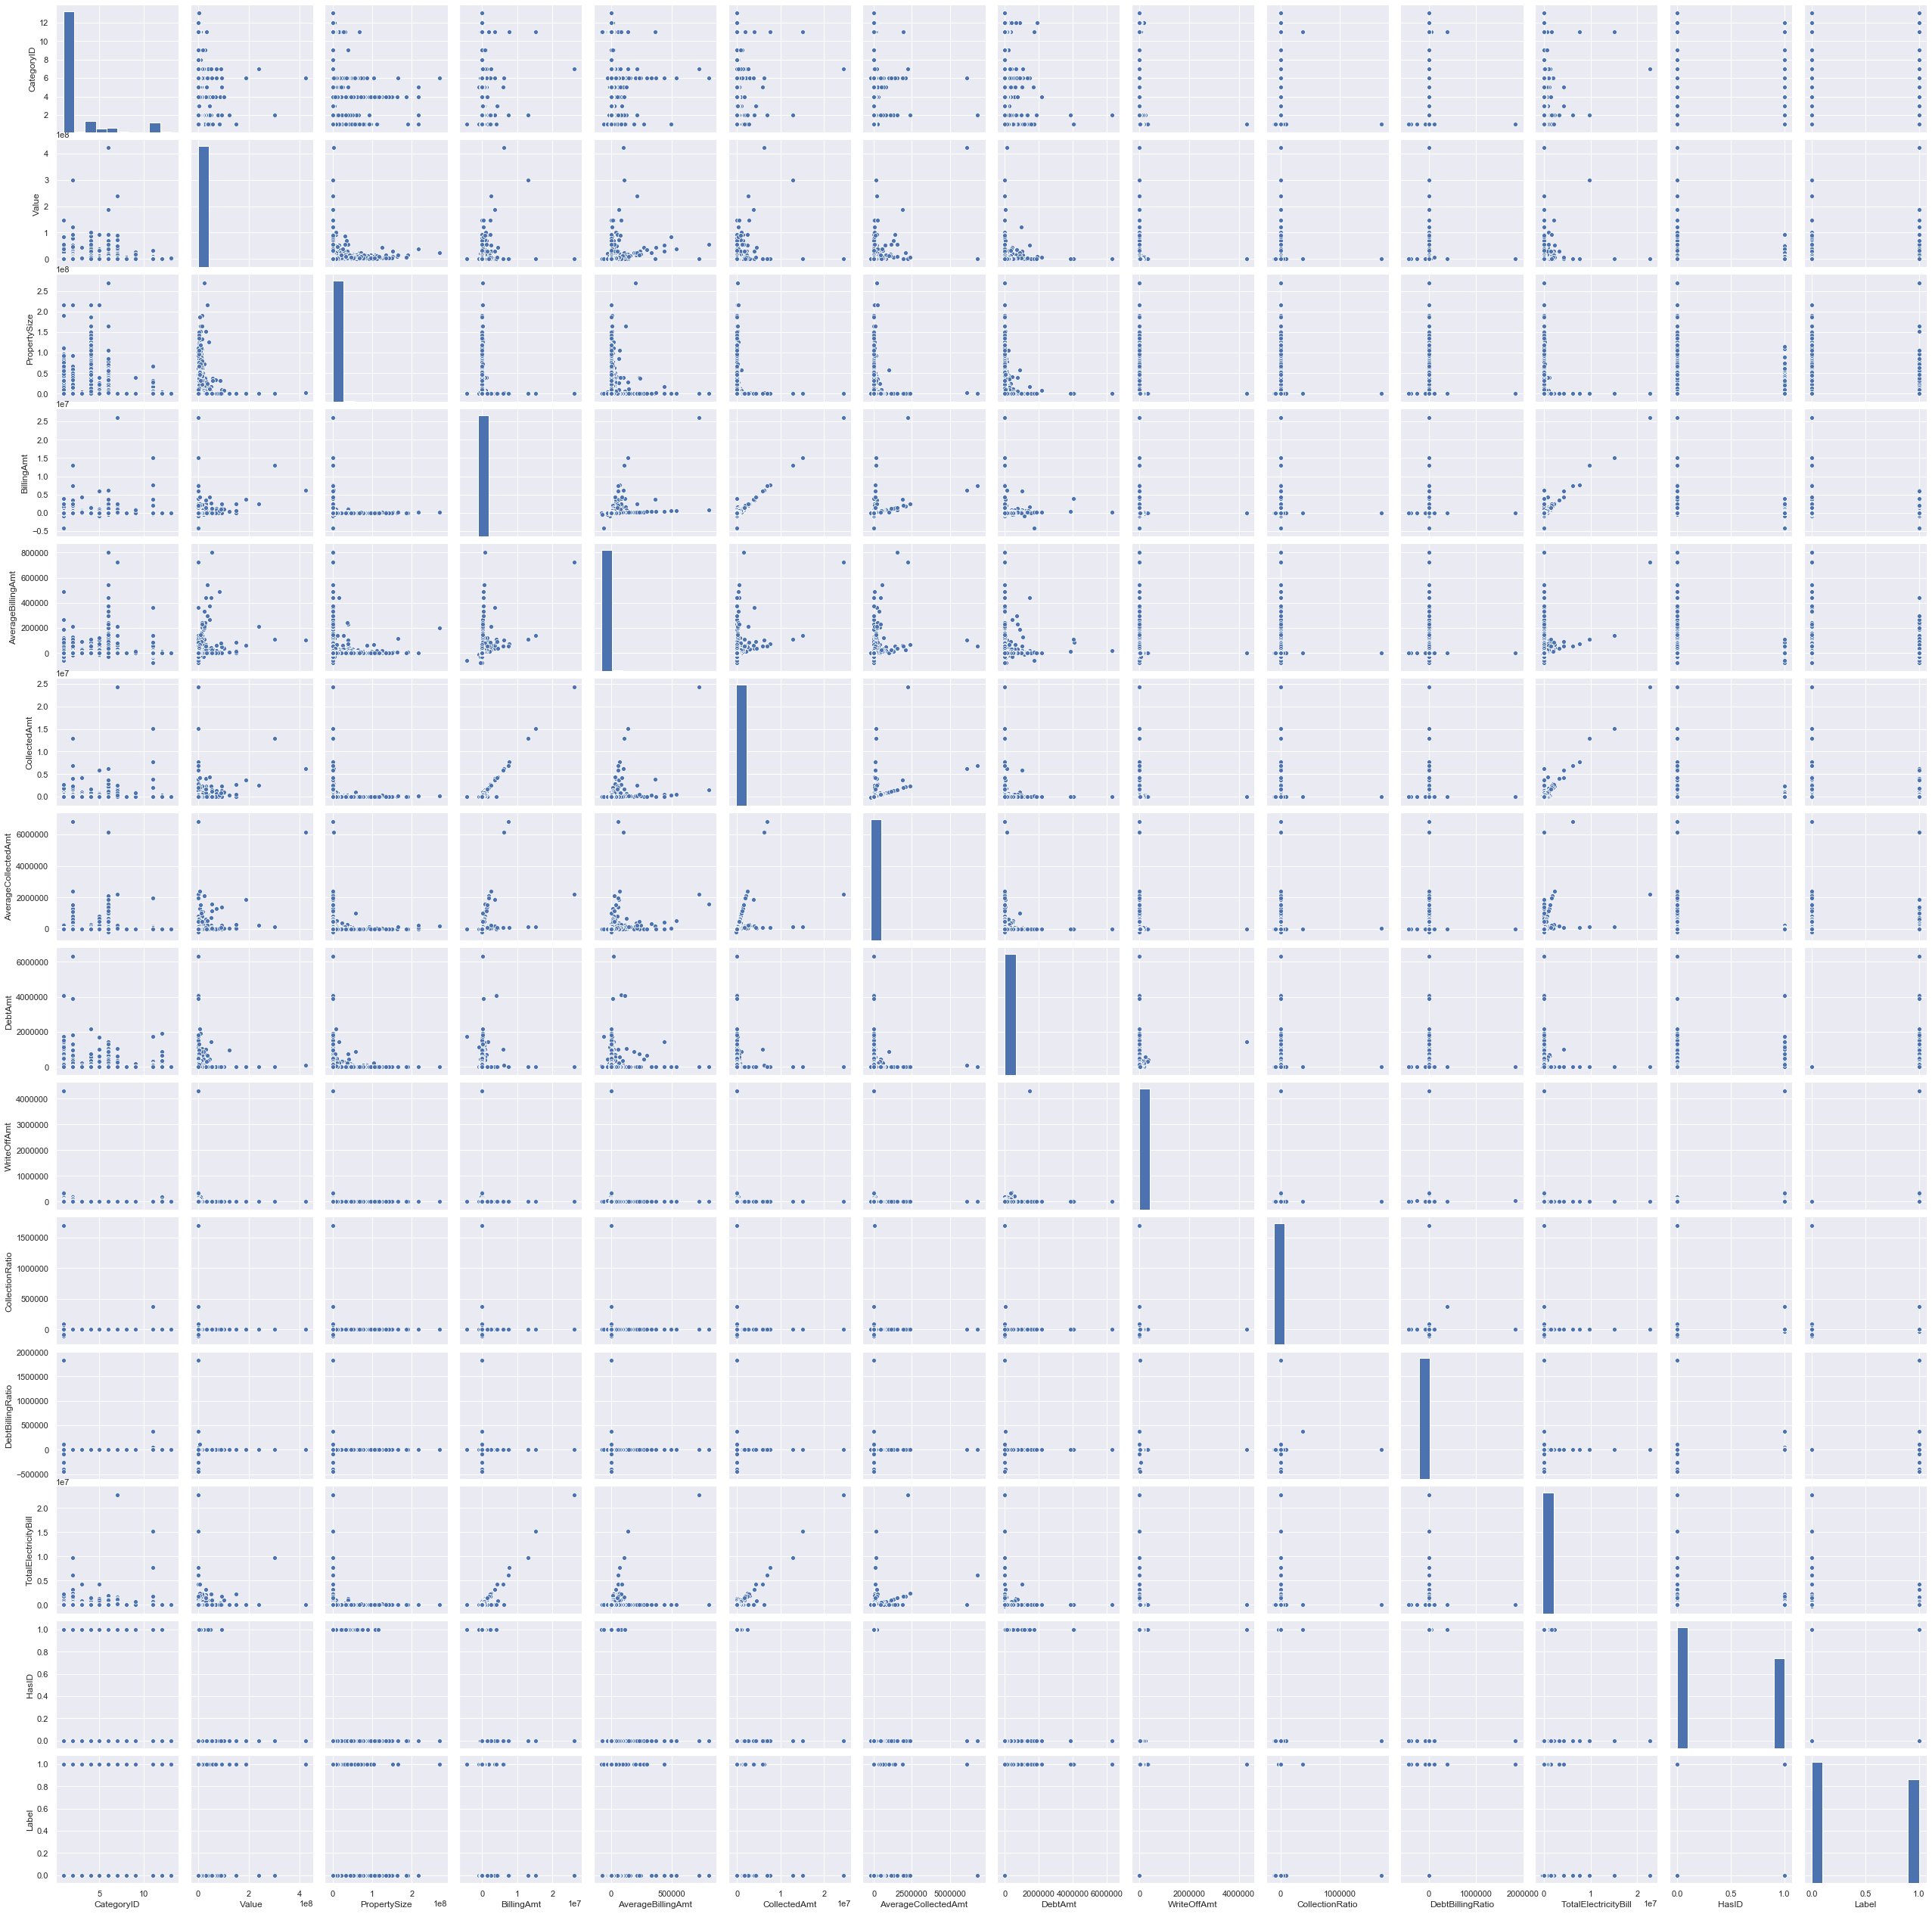

In [44]:
sns.pairplot(df,kind="kde") 

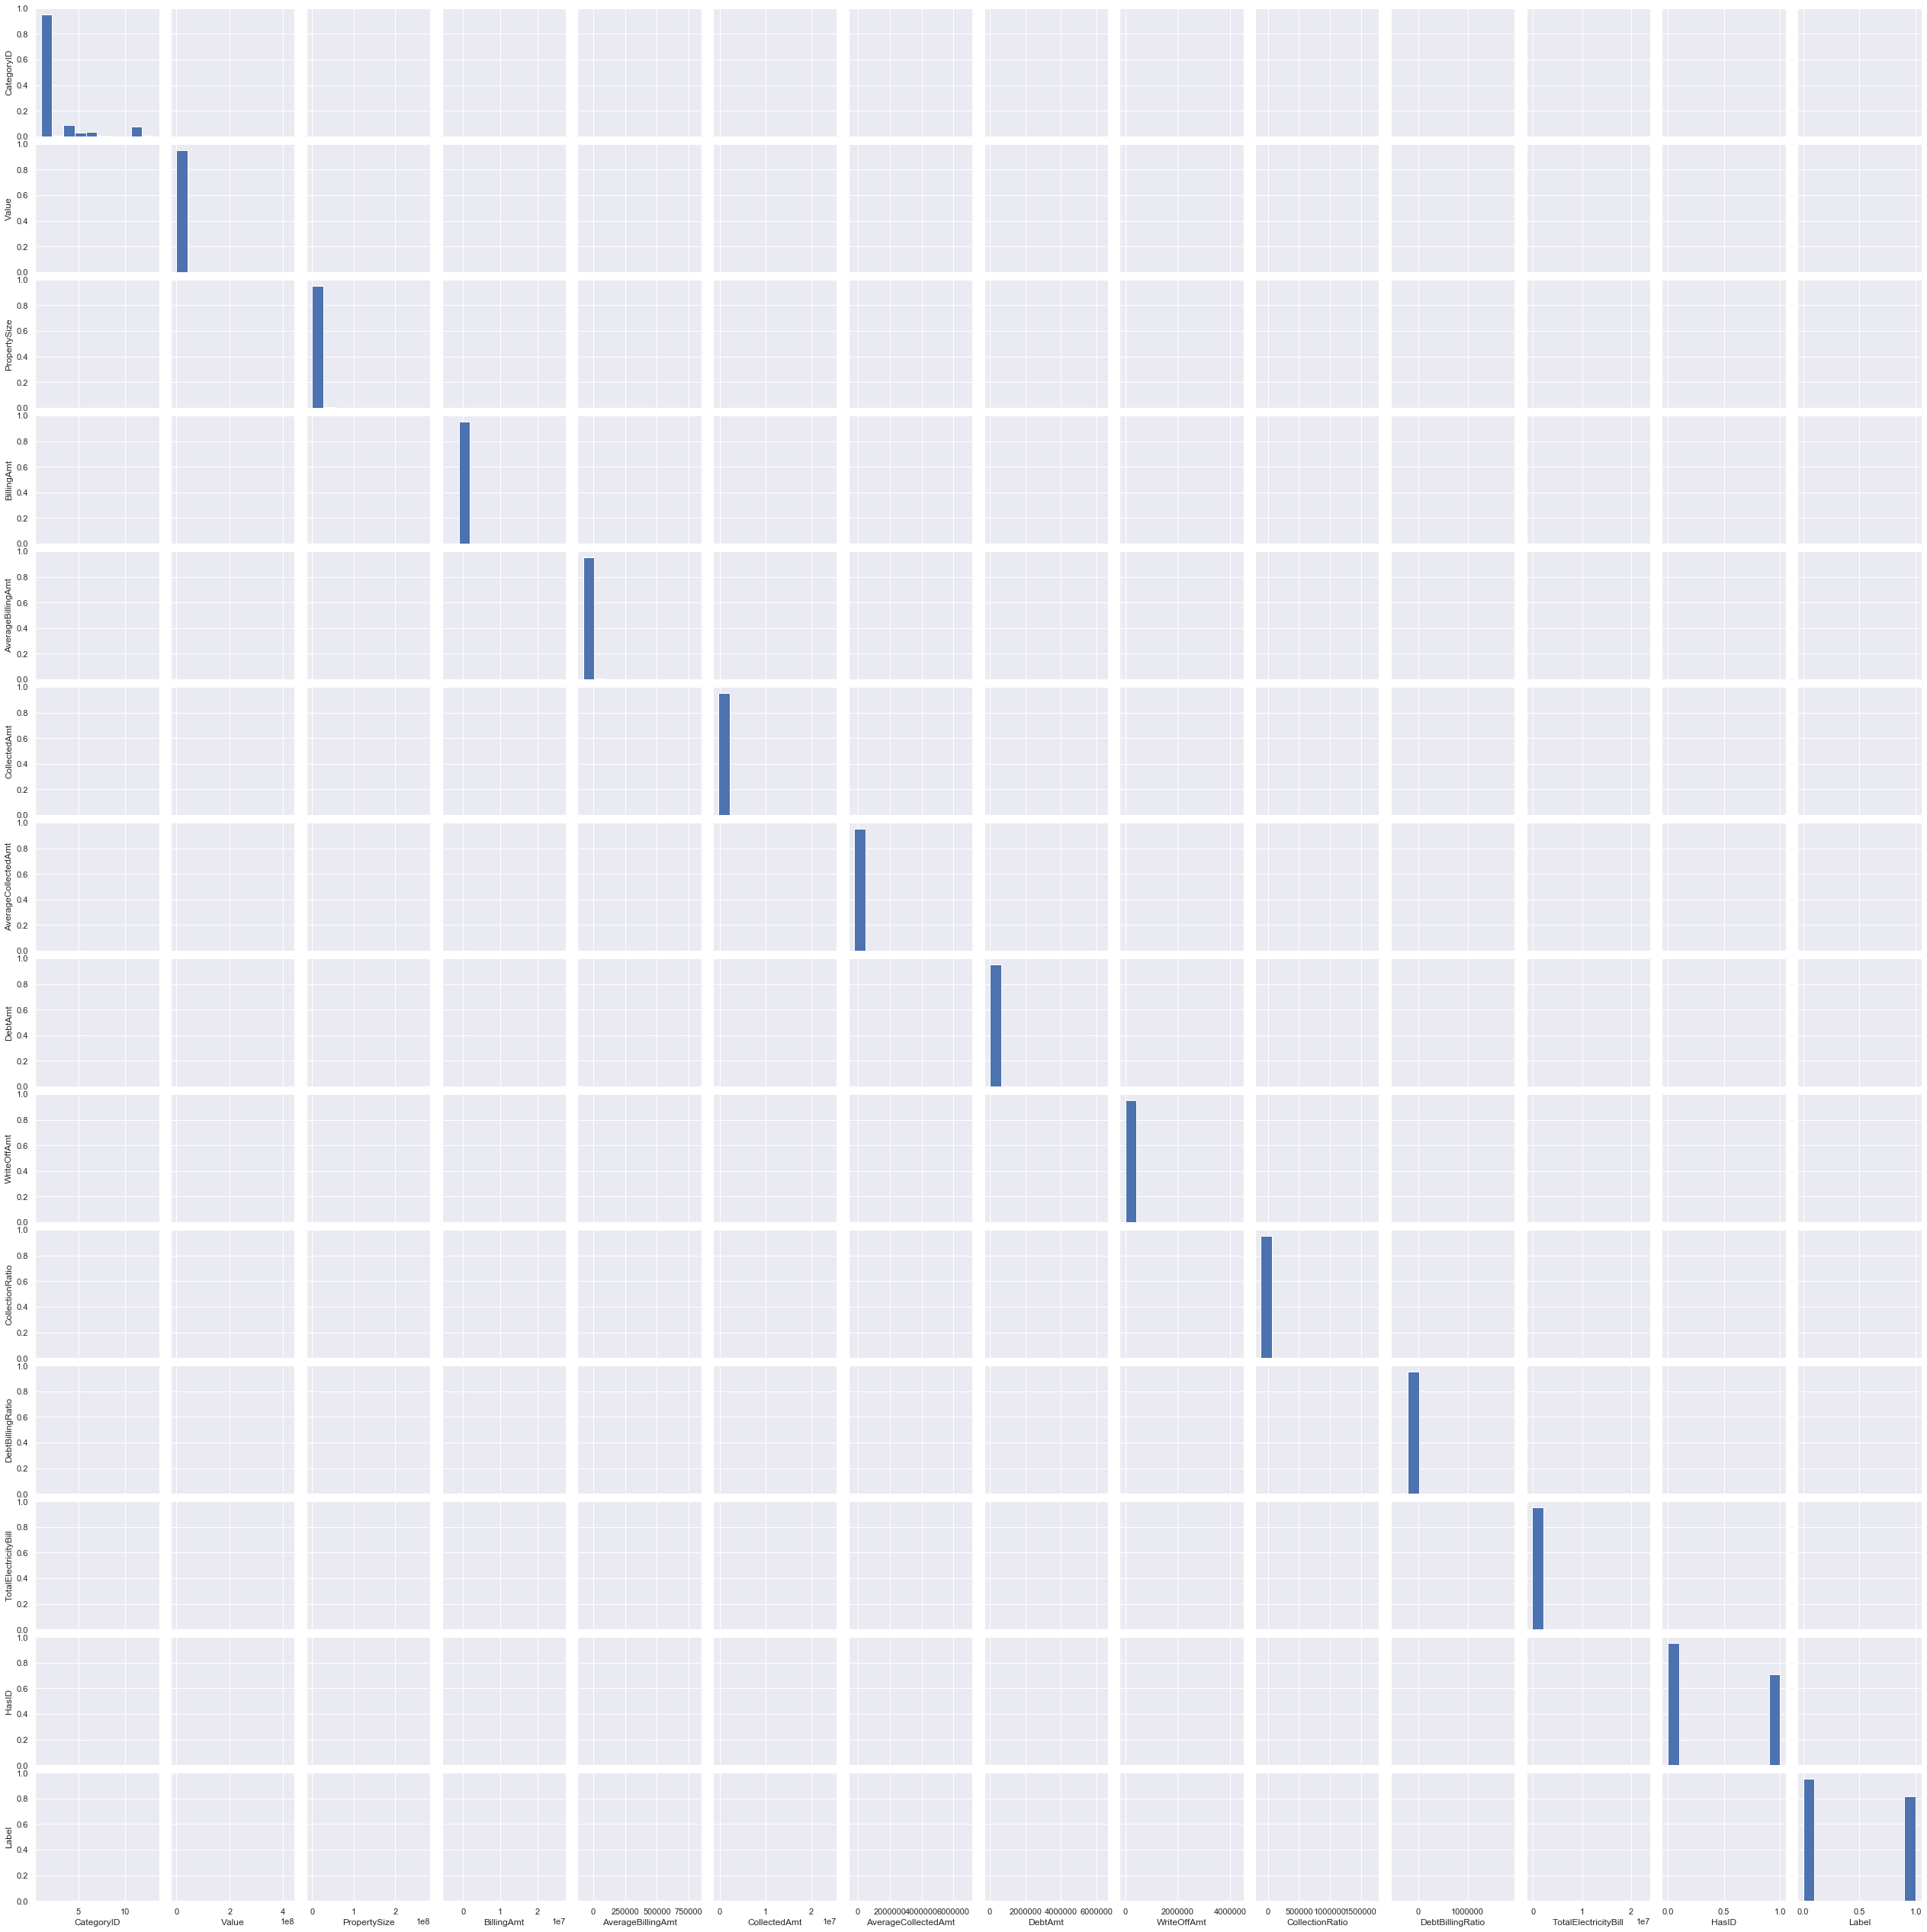

In [46]:
sns.pairplot(df,kind="kde") 

In [226]:
ps=df['AccID']

In [227]:
accids=test_df['AccID']

In [228]:
df = df.drop('AccID',axis=1)   # Independent variables
test_df=test_df.drop('AccID',axis=1)

In [229]:
df = df.drop('Category',axis=1)   # Independent variables
test_df = test_df.drop('Category',axis=1)   # Independent variables

In [230]:
df.shape

(100476, 14)

In [231]:
y = df['Label']
X = df.drop('Label',axis=1)   # Independent variables



In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)

In [216]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lrr=lr.fit(X_train,y_train)
lrr.score(X_test, y_test)



F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9745827591486755

In [217]:
lrr=lr.fit(X,y)

F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [218]:
y_pred=lrr.predict(test_df)

In [170]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    model.fit(X_train, y_train)
    
    test_accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    
    pred = model.predict(X_test)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    return test_accuracy, train_accuracy, precision, recall, f1

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.svm import SVC
svm = SVC()

In [68]:
result = pd.DataFrame(columns=['test_accuracy', 'train_accuracy', 'precision', 'recall', 'f1'])

for name, model in zip(['Logistic Regression', 'Naive Bayes', 'SVM'], [lr, nb, svm]):
                       
    result.loc[name,:] = fit_n_print(model, X_train_std, X_test_std, y_train, y_test)

F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
result

,test_accuracy,train_accuracy,precision,recall,f1
Logistic Regression,0.790997,0.884183,0.998488,0.547868,0.707521
Naive Bayes,0.461415,0.990082,0.461415,1,0.631463
SVM,0.795284,0.870982,0.998513,0.557159,0.715229


In [224]:
#trying with relevant variables
pf=df[['CollectionRatio','DebtBillingRatio','TotalElectricityBill','HasID','CategoryID','DebtAmt','WriteOffAmt','Value']]

In [118]:

X = pf  



In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [93]:
fit_n_print(lr, X_train_std, X_test_std, y_train, y_test)

(1.0, 0.8899119096202658, 1.0, 1.0, 1.0)

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train_std,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
testing=test_df[['CollectionRatio','DebtBillingRatio','TotalElectricityBill','HasID','CategoryID','DebtAmt','WriteOffAmt','Value']]

In [108]:
y_pred = logreg.predict(testing)

In [198]:
final=pd.DataFrame(accids,columns=['AccID'])

In [199]:
final

,AccID
0,d0390389-df62-4bf1-8659-bbc736ce777d
1,b662b850-85e7-40d6-8fdd-3c2566a154dd
2,41b6ebc4-569c-4c93-8cfa-3d85bce546ac
3,6f0ecc23-da5c-4b84-bcd0-4fae4b3a5aec
4,6467f24e-d256-4e6d-8c0d-b726e8d80f48
...,...
33488,eb61949a-70b3-46db-b978-9e20f0d8919d
33489,6d2d00c3-dbd7-49a7-abc8-b1635af2cc32
33490,f9ab20e9-5803-46c5-b41e-bed6fda06773
33491,fedb8241-a9fb-48dd-adfa-b874e0da7ac5


In [200]:
final['Label']=y_pred

In [201]:
final

,AccID,Label
0,d0390389-df62-4bf1-8659-bbc736ce777d,1
1,b662b850-85e7-40d6-8fdd-3c2566a154dd,0
2,41b6ebc4-569c-4c93-8cfa-3d85bce546ac,0
3,6f0ecc23-da5c-4b84-bcd0-4fae4b3a5aec,1
4,6467f24e-d256-4e6d-8c0d-b726e8d80f48,0
...,...,...
33488,eb61949a-70b3-46db-b978-9e20f0d8919d,0
33489,6d2d00c3-dbd7-49a7-abc8-b1635af2cc32,1
33490,f9ab20e9-5803-46c5-b41e-bed6fda06773,0
33491,fedb8241-a9fb-48dd-adfa-b874e0da7ac5,1


In [202]:
final.to_csv('solution_16.csv')